<b>Blog link</b><br>
https://medium.com/@jayashakthiperera/linear-regression-e84901120f88

#### Required imports
First of all we need to add few imports.
<li>pandas - working with pandas dataframes
<li>matplotlib and seaborn - visualizing data
<li>scipy.stats - plottng Q-Q plots
<li>numpy - mathematical functions
We'll add more imports when required.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as stats
import numpy as np
import seaborn as sns

#### Import data
Import our data from the csv to a pandas dataframe. <br>
Note: 'Formatted Date' column contains datetime values in string format. We parse
those values as dates while importing data.

In [2]:
df = pd.read_csv('weatherHistory.csv', parse_dates=['Formatted Date'])
df_columns = df.columns
print(df_columns)
print(df.shape)
df.head()

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')
(96453, 12)


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00+02:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00+02:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00+02:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00+02:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00+02:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


There are 12 columns and 96453 data records in our dataset.<br>
Let's check what are the data types and how the data is distributed in each column.

In [3]:
print(df.info())
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB
None
                   Formatted Date        Summary Precip Type  Te

There are 4 object type columns and 8 numerical value columns.

## Drop duplicates
We can see that 'Formatted Date' columns shows some duplicate date values.
It's impossible to have two records for a specific time.<br>
Let's drop these duplicates.

In [4]:
df = df.drop_duplicates(['Formatted Date'], keep='first')
print(df.shape)

(96429, 12)


24 data records has been dropped as duplicates.<br><br>
We are going to sort the dataframe by 'Formatted Date' value and reset the indexes.<br>
Note : We reset index because dropping data rows removes that index too. When a index is absent,
it affects dataframe join operations negatively.

In [5]:
df.sort_values(by=['Formatted Date'], inplace=True)
df.reset_index(inplace=True, drop=True)
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-01-01 00:00:00+01:00,Partly Cloudy,rain,0.577778,-4.050000,0.89,17.1143,140.0,9.9820,0.0,1016.66,Mostly cloudy throughout the day.
1,2006-01-01 01:00:00+01:00,Mostly Cloudy,rain,1.161111,-3.238889,0.85,16.6152,139.0,9.9015,0.0,1016.15,Mostly cloudy throughout the day.
2,2006-01-01 02:00:00+01:00,Mostly Cloudy,rain,1.666667,-3.155556,0.82,20.2538,140.0,9.9015,0.0,1015.87,Mostly cloudy throughout the day.
3,2006-01-01 03:00:00+01:00,Overcast,rain,1.711111,-2.194444,0.82,14.4900,140.0,9.9015,0.0,1015.56,Mostly cloudy throughout the day.
4,2006-01-01 04:00:00+01:00,Mostly Cloudy,rain,1.183333,-2.744444,0.86,13.9426,134.0,9.9015,0.0,1014.98,Mostly cloudy throughout the day.


## Handling missing values and outliers

In the dataframe description we can see that all records under the 'Loud Cover'
column are 0 values. Therefore we can drop that column.
### Drop 'Loud Cover' column

In [6]:
df = df.drop(columns=['Loud Cover'])
print(df.shape)

(96429, 11)


We have sorted the dataframe using the 'Formatted Date' column. We are not going to
do a time series analysis, which means the 'Formatted Date' column is no loger useful.
### Drop 'Formatted Date' column

In [7]:
df = df.drop(columns=['Formatted Date'])
print(df.shape)

(96429, 10)


### Check null & drop
Let's get null value percentage per each column in our dataframe.

In [8]:
print(df.isnull().sum(axis=0) * 100/len(df))

Summary                     0.000000
Precip Type                 0.536146
Temperature (C)             0.000000
Apparent Temperature (C)    0.000000
Humidity                    0.000000
Wind Speed (km/h)           0.000000
Wind Bearing (degrees)      0.000000
Visibility (km)             0.000000
Pressure (millibars)        0.000000
Daily Summary               0.000000
dtype: float64


Only 0.54% of 'Precip Type' values are null values. Since it's a small amount of
total data records, we can drop those null values.

In [9]:
df = df[df['Precip Type'].notna()]
print(df.shape)

(95912, 10)


### Check outliers for each numerical columns
We are going to draw boxplots for each numerical columns and check for outliers.

In [10]:
sns.set(rc={'figure.figsize':(20,8)}, style='whitegrid')

<AxesSubplot:>

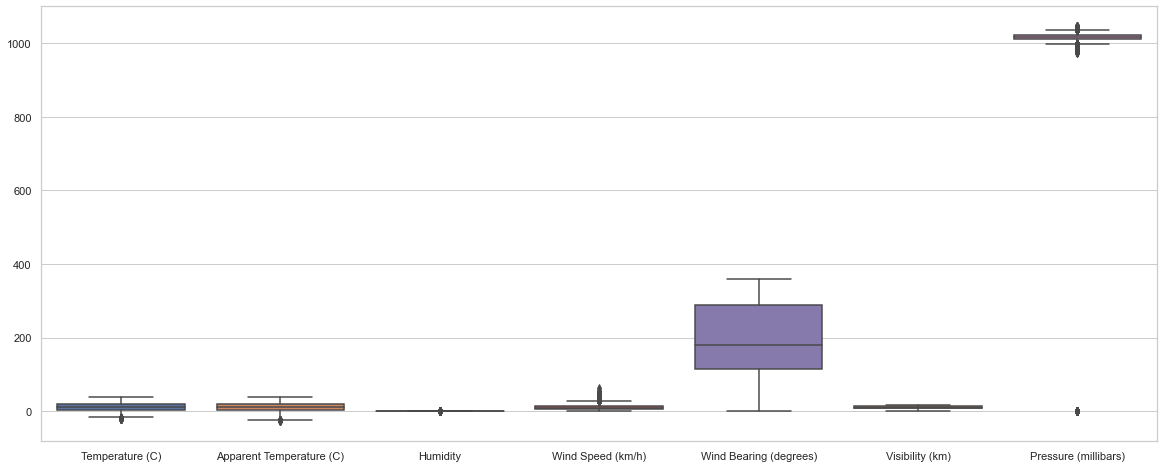

In [11]:
columns = df.columns
sns.boxplot(data=df)

It's difficult to identify outliers using above plot. Each column is needed to
be checked individually.
#### Temperature (C)

<AxesSubplot:>

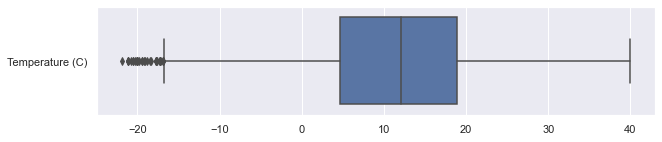

In [12]:
sns.set(rc={'figure.figsize':(10,2)})
feature_name = 'Temperature (C)';
temp_df = pd.DataFrame(df[feature_name], columns=[feature_name])
sns.boxplot(data=temp_df, orient='h')

'Temperature' seems like skewed.
#### Apparent Temperature (C)

<AxesSubplot:>

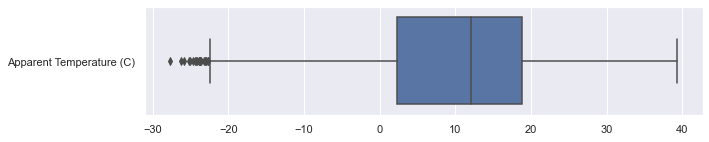

In [13]:
feature_name = 'Apparent Temperature (C)';
temp_df = pd.DataFrame(df[feature_name], columns=[feature_name])
sns.boxplot(data=temp_df, orient='h')

'Apparent Temperature' seems like skewed.
#### Humidity

<AxesSubplot:>

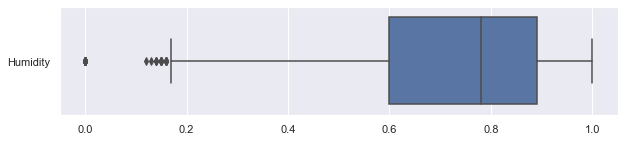

In [14]:
feature_name = 'Humidity';
temp_df = pd.DataFrame(df[feature_name], columns=[feature_name])
sns.boxplot(data=temp_df, orient='h')

'Humidity' contains 0 values that can be considered as outliers.
##### Drop humudity 0 rows

In [15]:
print('Humidity 0 rows count', temp_df[temp_df[feature_name] == 0.0].count())
df = df[df[feature_name] != 0.0]
print(df.shape)

Humidity 0 rows count Humidity    22
dtype: int64
(95890, 10)


22 records has been dropped as outliers under the 'Humidity'.
##### After dropping outliers

<AxesSubplot:>

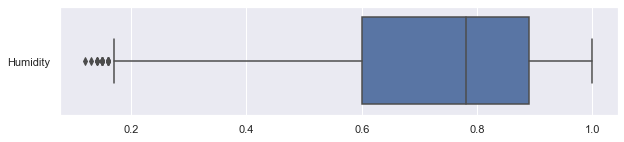

In [16]:
temp_df = pd.DataFrame(df[feature_name], columns=[feature_name])
sns.boxplot(data=temp_df, orient='h')

#### Wind Speed (km/h)

<AxesSubplot:>

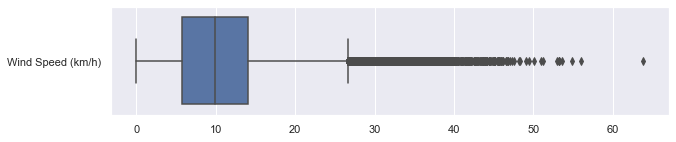

In [17]:
feature_name = 'Wind Speed (km/h)';
temp_df = pd.DataFrame(df[feature_name], columns=[feature_name])
sns.boxplot(data=temp_df, orient='h')

There is a data point greater that 60, which stays away from other data points.
Let's drop that point.

In [18]:
print(temp_df[temp_df[feature_name] > 60].count())
df = df[df[feature_name] <= 60]
print(df.shape)

Wind Speed (km/h)    1
dtype: int64
(95889, 10)


##### After dropping outliers

<AxesSubplot:>

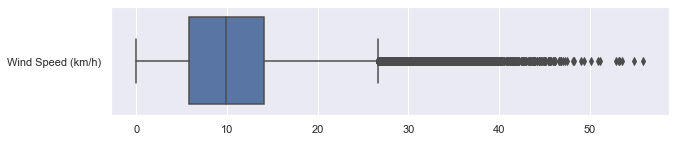

In [19]:
temp_df = pd.DataFrame(df[feature_name], columns=[feature_name])
sns.boxplot(data=temp_df, orient='h')

#### Wind Bearing (degrees)

<AxesSubplot:>

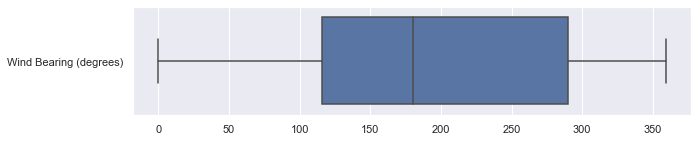

In [20]:
feature_name = 'Wind Bearing (degrees)';
temp_df = pd.DataFrame(df[feature_name], columns=[feature_name])
sns.boxplot(data=temp_df, orient='h')

#### Visibility (km)

<AxesSubplot:>

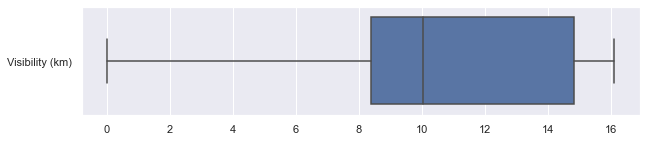

In [21]:
feature_name = 'Visibility (km)';
temp_df = pd.DataFrame(df[feature_name], columns=[feature_name])
sns.boxplot(data=temp_df, orient='h')

#### Pressure (millibars)

<AxesSubplot:>

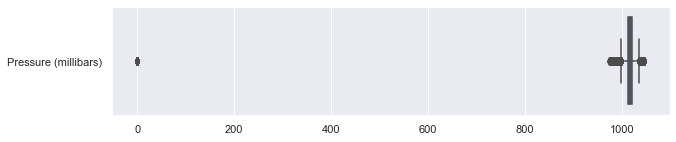

In [22]:
feature_name = 'Pressure (millibars)';
temp_df = pd.DataFrame(df[feature_name], columns=[feature_name])
sns.boxplot(data=temp_df, orient='h')

There are 0 values, which stays away from other data points.
Let's drop that points.
##### Drop Pressure 0 rows

In [23]:
print(temp_df[temp_df[feature_name] == 0].count())
df = df[df[feature_name] > 0]
print(df.shape)

Pressure (millibars)    1288
dtype: int64
(94601, 10)


##### After dropping outliers

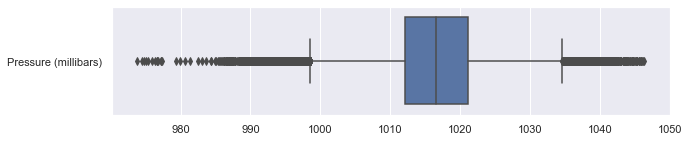

In [24]:
temp_df = pd.DataFrame(df[feature_name], columns=[feature_name])
sns.boxplot(data=temp_df, orient='h')
df.reset_index(inplace=True, drop=True)

## Q-Q Plots & Histograms
We can analyze data using Q-Q plots and Histograms to identify any skewed features.

In [25]:
sns.set(rc={'figure.figsize':(20,10)})

#### Q-Q Plots

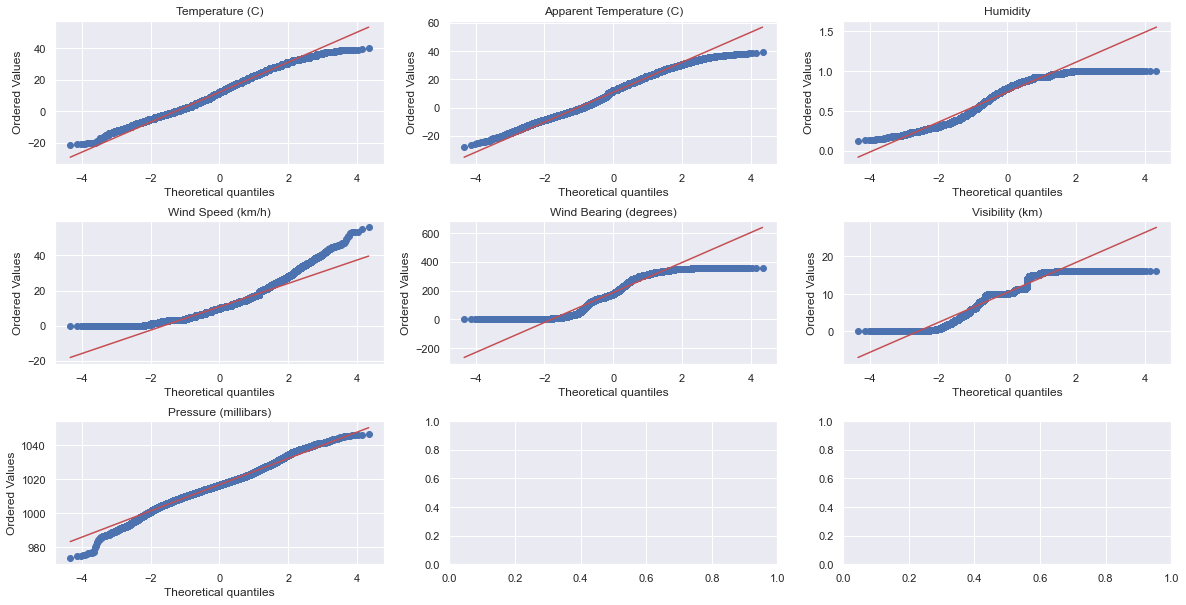

In [26]:
fig, axes = plt.subplots(3,3)
plt.subplots_adjust(hspace = 0.4)
for i, column in enumerate(columns[2:9]):
    stats.probplot(df[column], dist="norm", plot=axes[int(i/3)][i%3])
    axes[int(i/3)][i%3].set_title(column)
plt.show()

#### Histograms

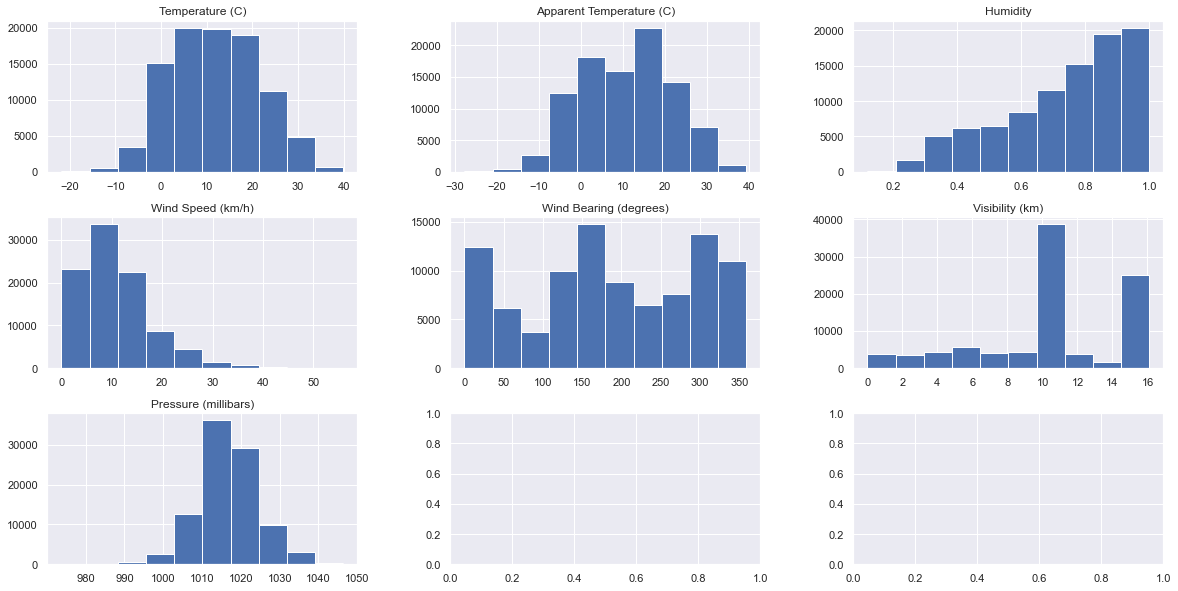

In [27]:
fig, axes = plt.subplots(3,3)
for i, column in enumerate(columns[2:9]):
    temp_df = pd.DataFrame(df[column], columns=[column])
    temp_df.hist(ax=axes[int(i/3)][i%3])
plt.show()

We can clearly see, <br>
<li>left skewness in 'Humidity'
<li>right skewness in 'Wind Speed'

#### Wind Speed (km/h)

array([<AxesSubplot:title={'center':'Wind Speed (km/h)'}>], dtype=object)

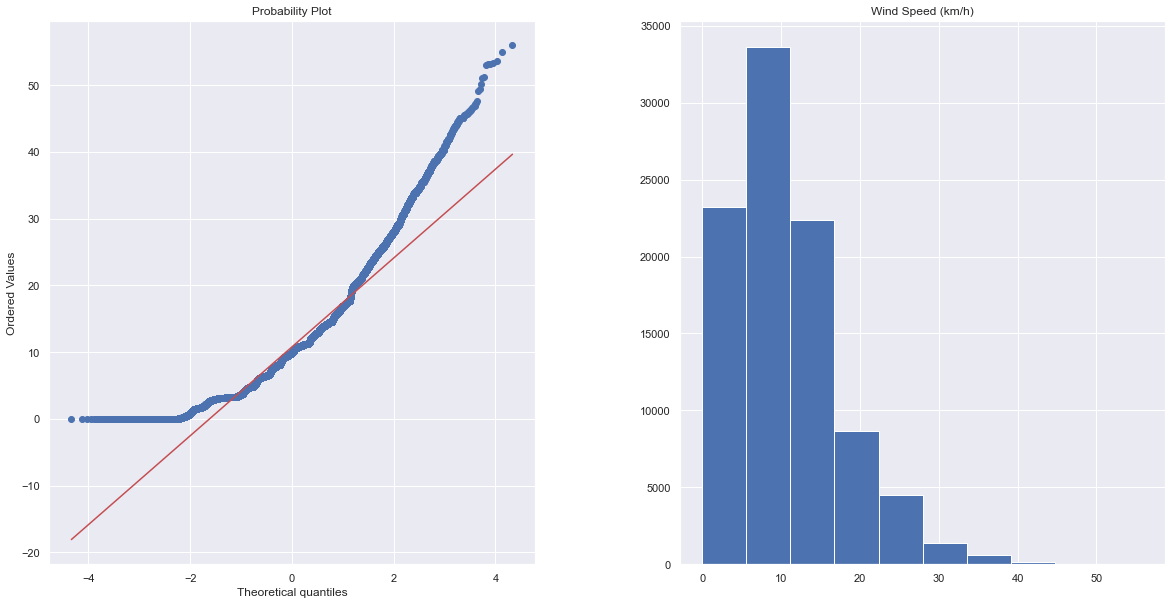

In [28]:
fig, axes = plt.subplots(1,2)
feature_name = 'Wind Speed (km/h)';
stats.probplot(df[feature_name], dist="norm", plot=axes[0])

temp_df = pd.DataFrame(df[feature_name], columns=[feature_name])
temp_df.hist(ax=axes[1])

'Wind speed' is right skewed. Apply squre root transformation since there are
zero values.

In [29]:
from sklearn.preprocessing import FunctionTransformer

# squre root transformation for 'Wind Speed'
sqrt_transformer = FunctionTransformer(np.sqrt, validate=True)
data_transformed = sqrt_transformer.transform(df[[feature_name]])
df[feature_name] = data_transformed

After transformation.

array([<AxesSubplot:title={'center':'Wind Speed (km/h)'}>], dtype=object)

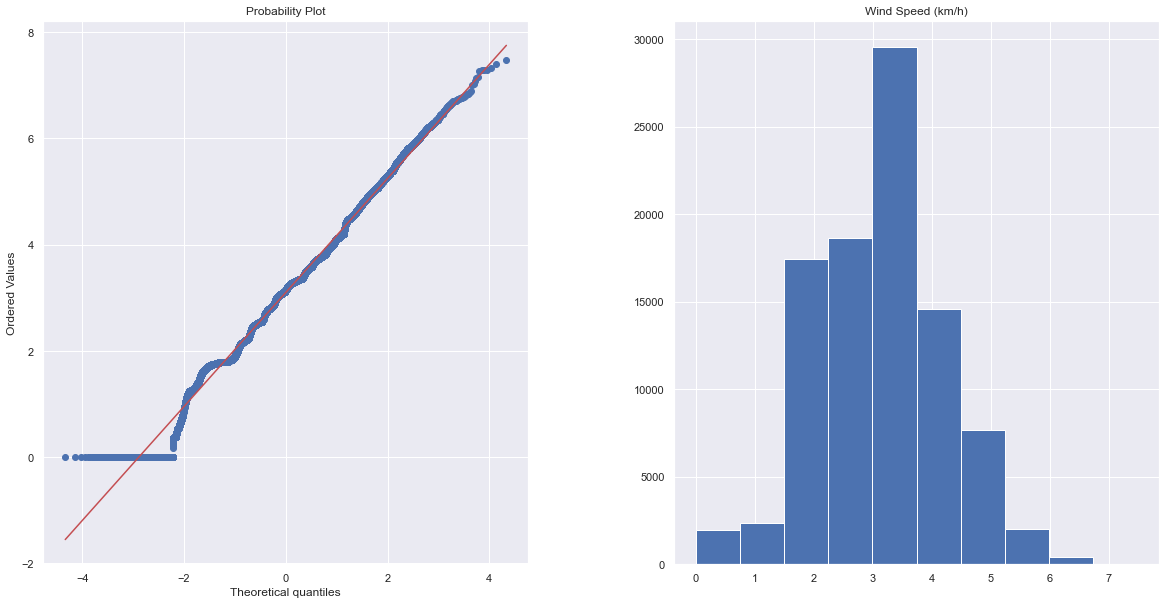

In [30]:
fig, axes = plt.subplots(1,2)
feature_name = 'Wind Speed (km/h)';
stats.probplot(df[feature_name], dist="norm", plot=axes[0])

temp_df = pd.DataFrame(df[feature_name], columns=[feature_name])
temp_df.hist(ax=axes[1])

#### Humidity

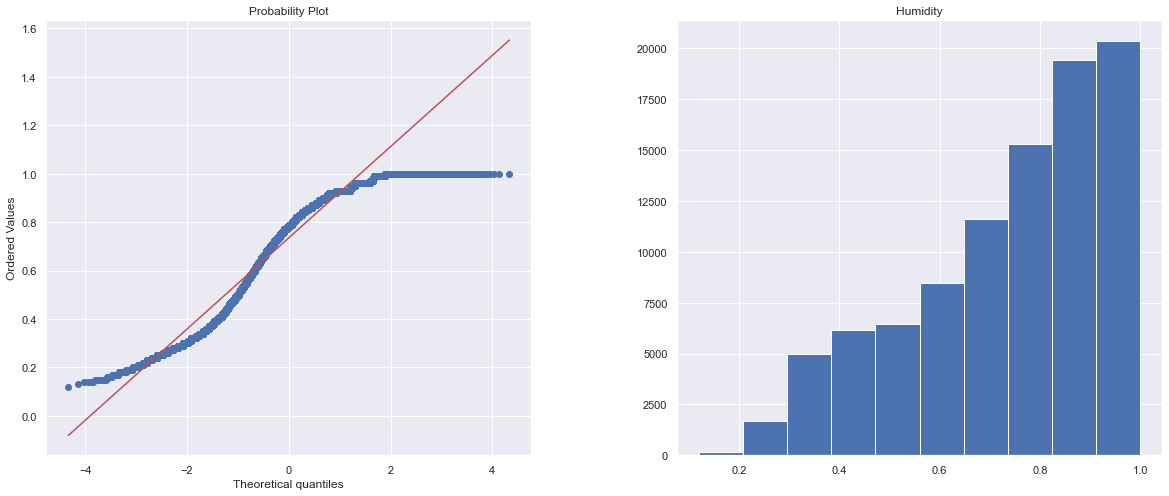

In [31]:
sns.set(rc={'figure.figsize':(20,8)})
fig, axes = plt.subplots(1,2)
feature_name = 'Humidity';
stats.probplot(df[feature_name], dist="norm", plot=axes[0])

temp_df = pd.DataFrame(df[feature_name], columns=[feature_name])
temp_df.hist(ax=axes[1])

plt.show()

'Humidity' is left skewed. Apply power transformation with power of 2 since
we applied squre root transformation for 'Wind Speed'.
(In the purpose of balancing.)

In [32]:
# power transformation with power of 2 for 'Humidity'
power_transformer = FunctionTransformer(lambda x: x**2, validate=True)
data_transformed = power_transformer.transform(df[['Humidity']])
df[feature_name] = data_transformed

After transformation.

array([<AxesSubplot:title={'center':'Humidity'}>], dtype=object)

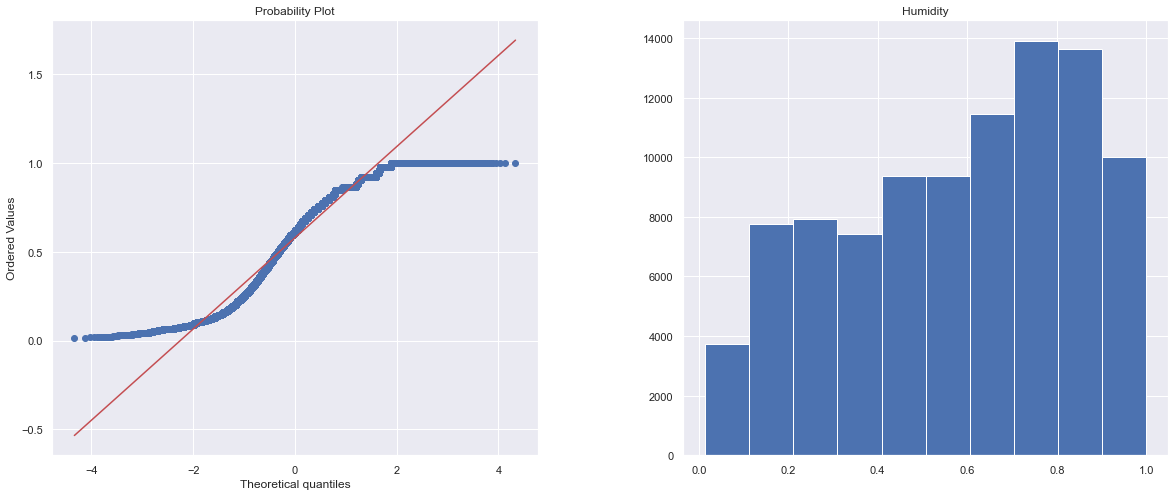

In [33]:
fig, axes = plt.subplots(1,2)
feature_name = 'Humidity';
stats.probplot(df[feature_name], dist="norm", plot=axes[0])

temp_df = pd.DataFrame(df[feature_name], columns=[feature_name])
temp_df.hist(ax=axes[1])

Skewness in 'Humidity' and 'Wind Speed' has been corrected upto some point.

We can see three categorical columns in the dataset as 'Precip Type', 'Summary',
'Daily Summary'. These columns are needed to be encoded.<br>
We are going to use One-hot encoding since we are training a linear model.

## Data encoding
#### Precip Type

In [34]:
feature_name = 'Precip Type'
df[feature_name].unique()

array(['rain', 'snow'], dtype=object)

In [35]:
df[feature_name] = df[feature_name].astype('category').cat.codes
df[feature_name].unique()

array([0, 1], dtype=int8)

For 'Precip Type', label encoding has been applied since there are only two unique
values under that column. This will work as One-hot encording and avoid addition of
an extra column. We can rain and snow has been replaced with 0 and 1.

#### Summary

In [36]:
feature_name = 'Summary'
print(df[feature_name].describe())
print(df[feature_name].unique())

count             94601
unique               26
top       Partly Cloudy
freq              31503
Name: Summary, dtype: object
['Partly Cloudy' 'Mostly Cloudy' 'Overcast' 'Foggy' 'Clear'
 'Breezy and Overcast' 'Breezy and Mostly Cloudy' 'Windy and Overcast'
 'Windy and Foggy' 'Breezy and Foggy' 'Breezy and Partly Cloudy'
 'Windy and Partly Cloudy' 'Humid and Mostly Cloudy'
 'Humid and Partly Cloudy' 'Breezy' 'Windy and Mostly Cloudy'
 'Dry and Partly Cloudy' 'Dry' 'Windy' 'Humid and Overcast'
 'Breezy and Dry' 'Dry and Mostly Cloudy' 'Light Rain' 'Drizzle'
 'Windy and Dry' 'Rain']


In [37]:
encoded_summary = pd.get_dummies(df['Summary'])
encoded_summary.head()

,Breezy,Breezy and Dry,Breezy and Foggy,Breezy and Mostly Cloudy,Breezy and Overcast,Breezy and Partly Cloudy,Clear,Drizzle,Dry,Dry and Mostly Cloudy,...,Mostly Cloudy,Overcast,Partly Cloudy,Rain,Windy,Windy and Dry,Windy and Foggy,Windy and Mostly Cloudy,Windy and Overcast,Windy and Partly Cloudy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


'Summary' column contains 26 unique values and 26 additional rows are added after
performing one-hot encoding.

#### Daily Summary

In [38]:
feature_name = 'Daily Summary'
print(df[feature_name].describe())
print(df[feature_name].unique())

count                                 94601
unique                                  214
top       Mostly cloudy throughout the day.
freq                                  19949
Name: Daily Summary, dtype: object
['Mostly cloudy throughout the day.' 'Overcast throughout the day.'
 'Foggy in the morning.' 'Foggy until morning.'
 'Foggy starting overnight continuing until morning.'
 'Partly cloudy in the afternoon.'
 'Partly cloudy starting in the morning.' 'Mostly cloudy until afternoon.'
 'Foggy starting overnight continuing until night.'
 'Mostly cloudy starting overnight continuing until evening.'
 'Mostly cloudy starting overnight.'
 'Mostly cloudy starting overnight continuing until night.'
 'Mostly cloudy until night.'
 'Mostly cloudy throughout the day and breezy in the evening.'
 'Partly cloudy starting in the morning continuing until afternoon.'
 'Mostly cloudy starting in the morning.'
 'Partly cloudy throughout the day.'
 'Foggy starting in the morning continuing until afternoo

In [39]:
encoded_daily_summary = pd.get_dummies(df['Daily Summary'])
encoded_daily_summary.head()

,Breezy and foggy starting in the evening.,Breezy and foggy until morning.,Breezy and mostly cloudy overnight.,Breezy and partly cloudy in the afternoon.,Breezy in the morning and foggy in the evening.,Breezy in the morning and mostly cloudy starting in the evening.,Breezy in the morning and mostly cloudy starting in the morning.,Breezy in the morning and partly cloudy starting in the evening continuing until night.,Breezy overnight and mostly cloudy throughout the day.,Breezy overnight and overcast throughout the day.,...,Partly cloudy until evening.,Partly cloudy until morning.,Partly cloudy until night and breezy in the afternoon.,Partly cloudy until night and breezy in the morning.,Partly cloudy until night and breezy starting in the morning continuing until afternoon.,Partly cloudy until night.,Rain throughout the day.,Rain until afternoon.,Rain until morning.,Windy in the afternoon.
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


'Daily Summary' column contains 214 unique values and 214 additional rows are added after
performing one-hot encoding.

In [40]:

df = df.join(encoded_summary)
df = df.join(encoded_daily_summary)
df = df.drop(columns=['Daily Summary', 'Summary'])
df.head()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Breezy,Breezy and Dry,...,Partly cloudy until evening.,Partly cloudy until morning.,Partly cloudy until night and breezy in the afternoon.,Partly cloudy until night and breezy in the morning.,Partly cloudy until night and breezy starting in the morning continuing until afternoon.,Partly cloudy until night.,Rain throughout the day.,Rain until afternoon.,Rain until morning.,Windy in the afternoon.
0,0,0.577778,-4.050000,0.7921,4.136943,140.0,9.9820,1016.66,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1.161111,-3.238889,0.7225,4.076175,139.0,9.9015,1016.15,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1.666667,-3.155556,0.6724,4.500422,140.0,9.9015,1015.87,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.711111,-2.194444,0.6724,3.806573,140.0,9.9015,1015.56,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1.183333,-2.744444,0.7396,3.733979,134.0,9.9015,1014.98,0,0,...,0,0,0,0,0,0,0,0,0,0


All the encoded columns are joined to original dataset. Total number of columns
has been increased from 10 to 248.<br><br>

Inorder to avoid data leakage we'll perform Standardization and PCA separately for
train and test dataset. We are going to split dataset into train and test in
0.8 to 0.2 ratio.<br><br>
'Apparent Temperature (C)' has been choosen as the target to be predicted.<br>
Note : If we consider both train and test data set together and do the standardization,
it helpes the model by revealing more information related to the test data set too.

## Split data to train and test

In [41]:
from sklearn.model_selection import train_test_split

df_data = df.drop('Apparent Temperature (C)', axis=1)
df_target = pd.DataFrame(df['Apparent Temperature (C)'], columns=['Apparent Temperature (C)'])
x_train, x_test, y_train, y_test = train_test_split(df_data, df_target, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)

(75680, 247)
(18921, 247)


Just reseting indexes for safety.

In [42]:
x_train.reset_index(inplace=True, drop=True)
x_test.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

## Data Scaling/Standardization
#### For feature data

In [43]:
from sklearn.preprocessing import StandardScaler

std_columns = ['Temperature (C)',
               'Humidity',
               'Wind Speed (km/h)',
               'Wind Bearing (degrees)',
               'Visibility (km)',
               'Pressure (millibars)']

scaler_train = StandardScaler()

scaler_train.fit(x_train[std_columns])
x_train_scaled = scaler_train.transform(x_train[std_columns])
x_test_scaled = scaler_train.transform(x_test[std_columns])
df_x_train_standardized = pd.DataFrame(x_train_scaled, columns = std_columns)
df_x_test_standardized = pd.DataFrame(x_test_scaled, columns = std_columns)

#### For target data

In [44]:
scaler_target = StandardScaler()

scaler_target.fit(y_train)
y_train_scaled = scaler_target.transform(y_train)
y_test_scaled = scaler_target.transform(y_test)
df_y_train_standardized = pd.DataFrame(y_train_scaled, columns = ['Apparent Temperature (C)'])
df_y_test_standardized = pd.DataFrame(y_test_scaled, columns = ['Apparent Temperature (C)'])

We have scaled both train and test data.<br>
Now we set scaled data to original dataset.

In [45]:
x_train[std_columns] = df_x_train_standardized
x_test[std_columns] = df_x_test_standardized
y_train = df_y_train_standardized
y_test = df_y_test_standardized

c:\users\shakthi\documents\ml_workspace\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Let's plot the correlation matrix of train dataset.<br>
Note: We have ignored categorical features for easiness.

<AxesSubplot:>

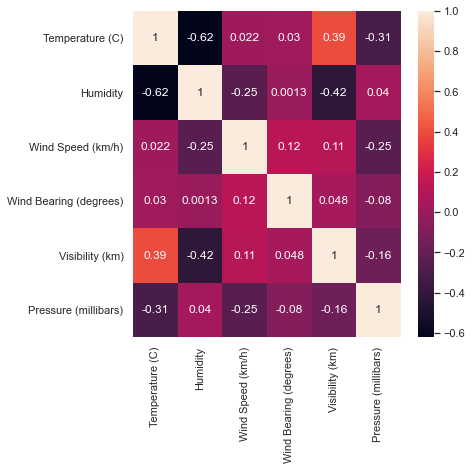

In [46]:
sns.set(rc={'figure.figsize':(6,6)})
sns.heatmap(df_x_train_standardized.corr(), annot=True)

There is no significant dependancy between any features.<br><br>
Let's check the correlation with the target.

<AxesSubplot:>

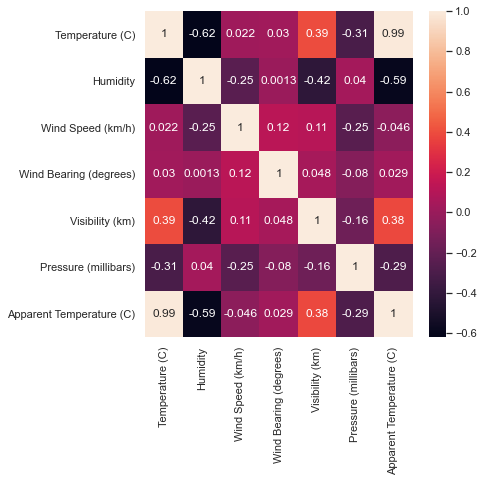

In [47]:
sns.heatmap(pd.concat([df_x_train_standardized, y_train], axis=1).corr(), annot=True)

We can see that humidity has a low negative correlation between both Temperature and
Apparent Temperature.

## Perform PCA
Let's fit training data into PCA and identify the most influancing component count.

In [48]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(x_train)
pca.explained_variance_ratio_

array([2.84191139e-01, 1.55127077e-01, 1.20287510e-01, 1.12366062e-01,
       8.64124870e-02, 4.05968011e-02, 3.36884226e-02, 2.39975793e-02,
       2.08411906e-02, 1.41932749e-02, 1.04991590e-02, 7.89270639e-03,
       7.44102387e-03, 6.49487907e-03, 5.81382524e-03, 5.25795116e-03,
       4.47682576e-03, 4.17475513e-03, 3.84002960e-03, 3.39486497e-03,
       3.30878435e-03, 2.83024464e-03, 2.46677276e-03, 2.01953187e-03,
       1.85189027e-03, 1.79936224e-03, 1.73130616e-03, 1.68124260e-03,
       1.55721393e-03, 1.40180440e-03, 1.24310906e-03, 1.16882789e-03,
       1.01805741e-03, 1.01600730e-03, 9.49665103e-04, 9.08042731e-04,
       7.16495572e-04, 6.99171817e-04, 6.47626421e-04, 5.87392165e-04,
       5.76106179e-04, 5.66139959e-04, 5.41647708e-04, 5.26856021e-04,
       5.14784682e-04, 4.92778316e-04, 4.59769632e-04, 4.38778250e-04,
       4.04761609e-04, 3.92687455e-04, 3.87906799e-04, 3.77678660e-04,
       3.68614325e-04, 3.55873894e-04, 3.41090614e-04, 3.32977876e-04,
      

We can consider unto 11 components. Now let's fit training and testing data into PCA
and reduce down to 11 components.

In [49]:
pca = PCA(n_components=11)
pca.fit(x_train)
pca_x_train = pca.transform(x_train)
pca_x_test = pca.transform(x_test)

In [50]:
from sklearn import linear_model

lm = linear_model.LinearRegression()
model = lm.fit(pca_x_train, y_train)

We have fitted training feature data and target data to the linear model. We can say
we have trained the model now.

### Check training accuracy
Let's predict the training target values using training feature data and calculate the
training accuracy.

In [51]:
predictions = lm.predict(pca_x_train)
y_train_pred = pd.DataFrame(predictions, columns=['Predicted Apparent Temperature (C)'])

In [52]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Mean Squred Error
mse = mean_squared_error(y_train, y_train_pred)
print('Mean squared error(Train) :', round(mse, 4))

# Root Mean Squared Error
rmsq = sqrt(mean_squared_error(y_train, y_train_pred))
print('Root mean squared error(Train) :', round(rmsq, 4))

# Accuracy
score = lm.score(pca_x_train, y_train)
print('Explained variance of the predictions(Train) :', round(score * 100, 4))

Mean squared error(Train) : 0.0117
Root mean squared error(Train) : 0.1081
Explained variance of the predictions(Train) : 98.8312


We have reached to a <b>98.83% of training accuracy.</b>

### Check testing accuracy
Now let's predict the testing target values using testing feature data and calculate the
testing accuracy.

In [53]:
predictions = lm.predict(pca_x_test)
y_pred = pd.DataFrame(predictions, columns=['Predicted Apparent Temperature (C)'])

In [54]:
# Mean Squred Error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error(Testing) :', round(mse, 4))

# Root Mean Squared Error
rmsq = sqrt(mean_squared_error(y_test, y_pred))
print('Root mean squared error(Testing) :', round(rmsq, 4))

# Accuracy
score = lm.score(pca_x_test, y_test)
print('Explained variance of the predictions(Testing) :', round(score * 100, 4))

Mean squared error(Testing) : 0.0118
Root mean squared error(Testing) : 0.1086
Explained variance of the predictions(Testing) : 98.8118


We have reached to a <b>98.81% of testing accuracy.</b>

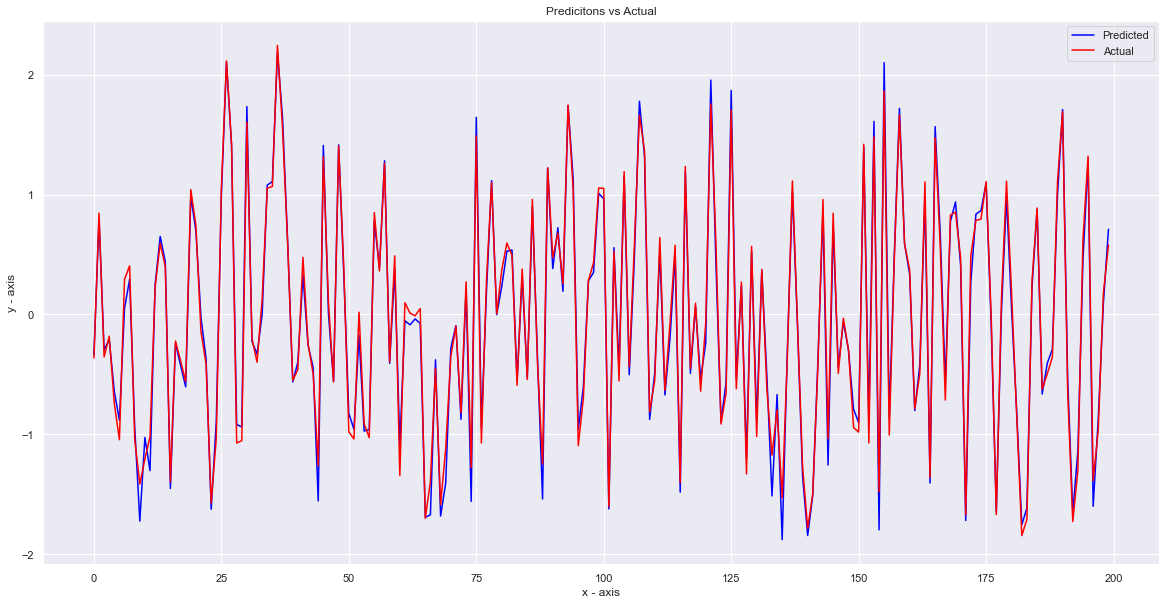

In [55]:
sns.set(rc={'figure.figsize':(20,10)})
plt.plot(y_pred[:200], label='Predicted', color='blue')
plt.plot(y_test[:200], label='Actual', color='red')
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('Predicitons vs Actual')
plt.legend()
plt.show()

Above plot shows how much the predicted Apparent Temperature varies from
the actual Apparent Temperature. There are few deviations here and there.

-----------
## Predict Apparent Temperature given only humidity.

Let's try to predict Apparent Temperature using only the humidity feature.<br>
Dataframes which has been scaled can be used for training a new linear model. Since
we are considering a single feature, no need to perform the PCA.

In [67]:
x_train_humidity = pd.DataFrame(x_train['Humidity'], columns=['Humidity'])
x_test_humidity = pd.DataFrame(x_test['Humidity'], columns=['Humidity'])

lm = linear_model.LinearRegression()
model = lm.fit(x_train_humidity, y_train)

### Training accuracy

In [68]:
predictions = lm.predict(x_train_humidity)
y_train_pred = pd.DataFrame(predictions, columns=['Predicted Apparent Temperature (C)'])

In [69]:
# Mean Squred Error
mse = mean_squared_error(y_train, y_train_pred)
print('Mean squared error(Train) :', round(mse, 4))

# Root Mean Squared Error
rmsq = sqrt(mean_squared_error(y_train, y_train_pred))
print('Root mean squared error(Train) :', round(rmsq, 4))

# Accuracy
score = lm.score(x_train_humidity, y_train)
print('Explained variance of the predictions(Train) :', round(score * 100, 4))

Mean squared error(Train) : 0.6495
Root mean squared error(Train) : 0.8059
Explained variance of the predictions(Train) : 35.049


### Testing accuracy

In [70]:
predictions = lm.predict(x_test_humidity)
y_pred = pd.DataFrame(predictions, columns=['Predicted Apparent Temperature (C)'])

In [71]:
# Mean Squred Error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error(Testing) :', round(mse, 4))

# Root Mean Squared Error
rmsq = sqrt(mean_squared_error(y_test, y_pred))
print('Root mean squared error(Testing) :', round(rmsq, 4))

# Accuracy
score = lm.score(x_test_humidity, y_test)
print('Explained variance of the predictions(Testing) :', round(score * 100, 4))

Mean squared error(Testing) : 0.6418
Root mean squared error(Testing) : 0.8011
Explained variance of the predictions(Testing) : 35.3132


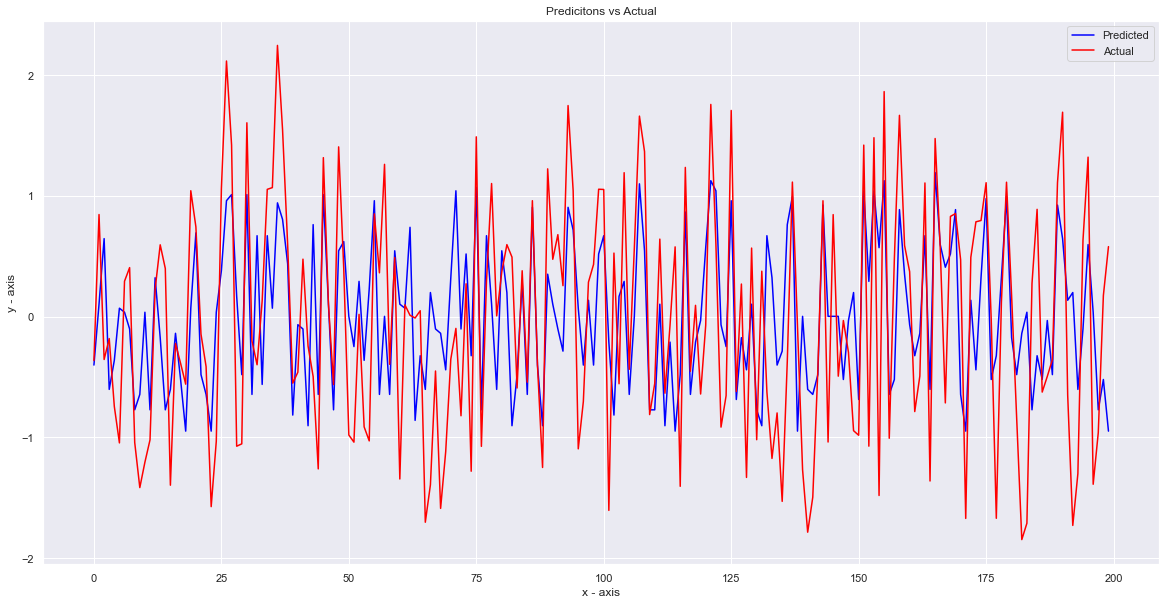

In [72]:
sns.set(rc={'figure.figsize':(20,10)})
plt.plot(y_pred[:200], label='Predicted', color='blue')
plt.plot(y_test[:200], label='Actual', color='red')
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('Predicitons vs Actual')
plt.legend()
plt.show()

We have got a <b>very poor accuracy</b> here (given only humidity).
<li>Training accuracy : 35.05%
<li>Testing accuracy : 35.31%
<br>
We can come to the conclusion that it's difficult to predict the Apparent Temperature
given only the humidity.

#### Perform polynomial regression with degree 2

In [62]:
from sklearn.preprocessing import PolynomialFeatures

trans = PolynomialFeatures(degree=2)
x_train_trans = trans.fit_transform(x_train_humidity)
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(x_train_trans, y_train)

LinearRegression()

In [63]:
predictions = linear_regressor.predict(x_train_trans)
y_train_pred = pd.DataFrame(predictions, columns=['Predicted Apparent Temperature (C)'])

In [64]:
# Mean Squred Error
mse = mean_squared_error(y_train, y_train_pred)
print('Mean squared error(Train) :', round(mse, 4))

Mean squared error(Train) : 0.6258


In [65]:
x_test_trans = trans.fit_transform(x_test_humidity)
predictions = linear_regressor.predict(x_test_trans)
y_pred = pd.DataFrame(predictions, columns=['Predicted Apparent Temperature (C)'])

In [66]:
# Mean Squred Error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error(Testing) :', round(mse, 4))

Mean squared error(Testing) : 0.6169


When we performed polynomial regression with degree 2, we can see a slight reduction of
Mean squared error.
<li>Training - 0.6495 > 0.6258
<li>Testing - 0.6418 > 0.6169